## **Creating Cohorts of Songs**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_excel('rolling_stones_spotify.xlsx')

In [103]:
# Check for duplicate rows
df_duplicates = df[df.duplicated()]

# Check for duplicate values in a specific column
df_duplicates = df[df['id'].duplicated()]


In [104]:
# Count the number of missing values in each column
df.isnull().sum()

# Drop rows with missing values
df = df.dropna()


In [105]:
# Identify and remove irrelevant values in a specific column
df = df[df['popularity'] > 0]


<AxesSubplot:xlabel='popularity'>

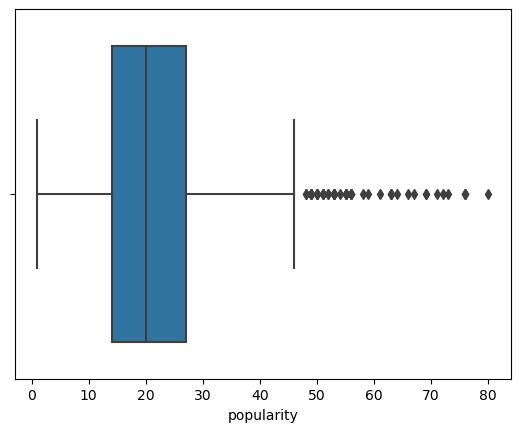

In [106]:
# Identify outliers using boxplots
sns.boxplot(x = df['popularity'])

In [107]:
# Calculate the number of popular songs in each album
df_album_counts = df.groupby('album')['popularity'].sum()

# Sort the album counts in descending order
df_album_counts = df_album_counts.sort_values(ascending=False)

# Get the top two albums
top_two_albums = df_album_counts.index[:2]

# Print the top two albums
print('Top two albums:', top_two_albums)


Top two albums: Index(['Honk (Deluxe)', 'Tattoo You (Super Deluxe)'], dtype='object', name='album')


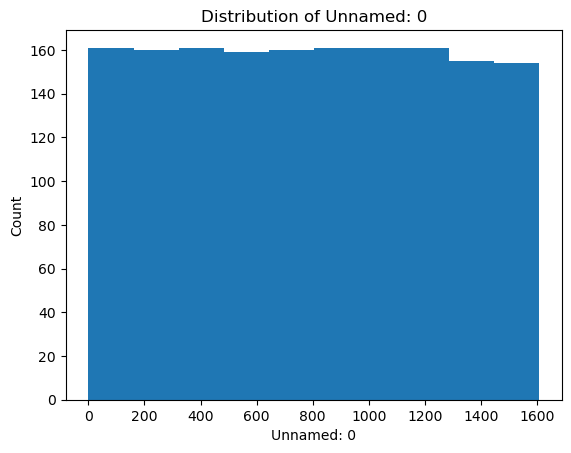

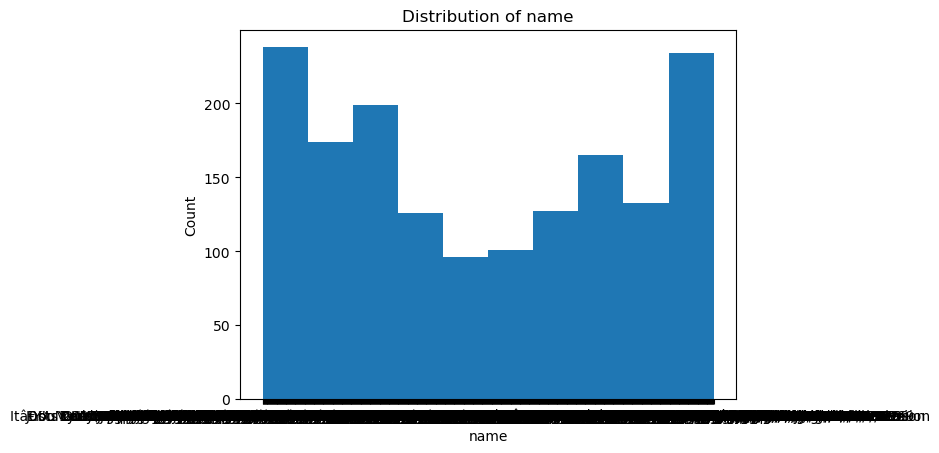

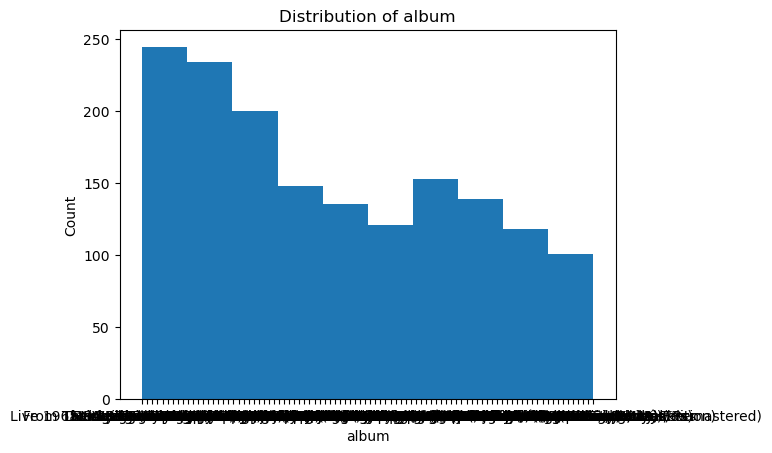

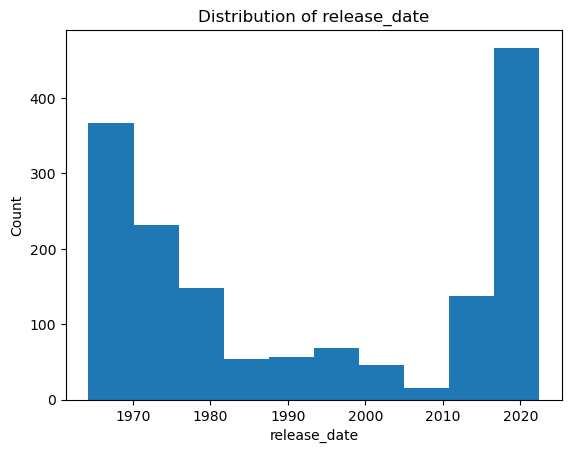

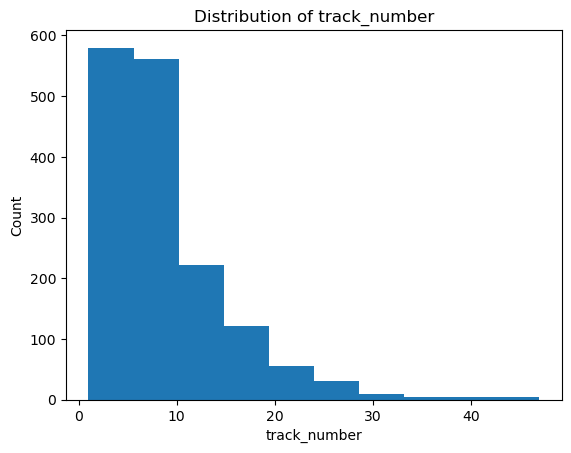

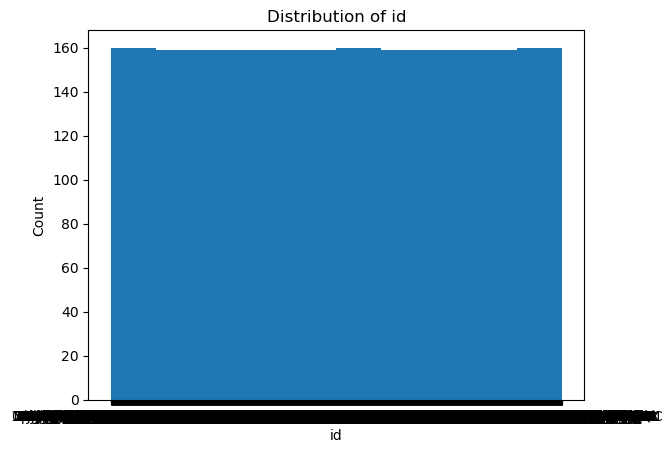

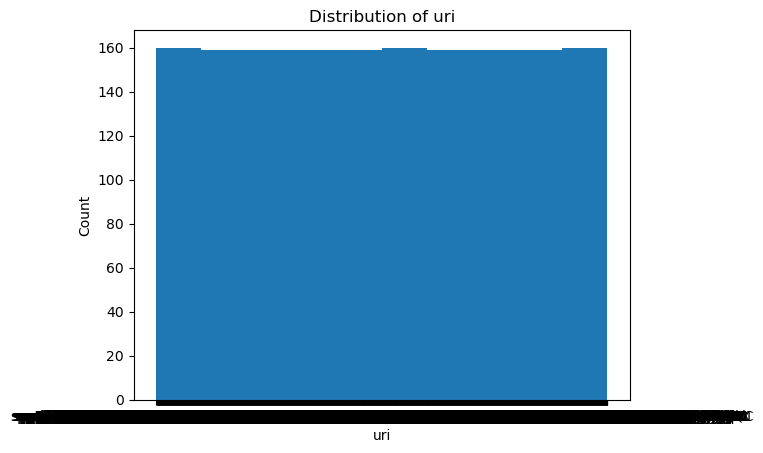

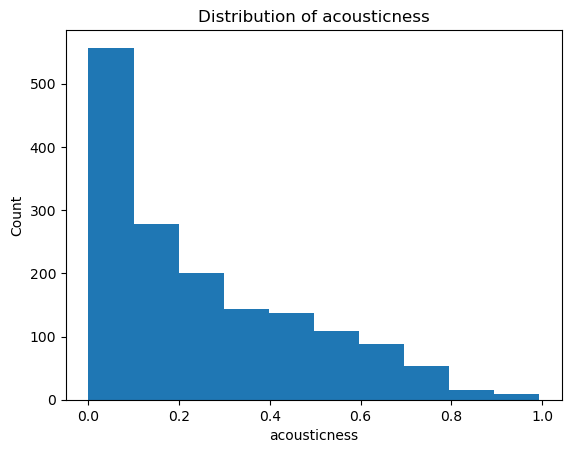

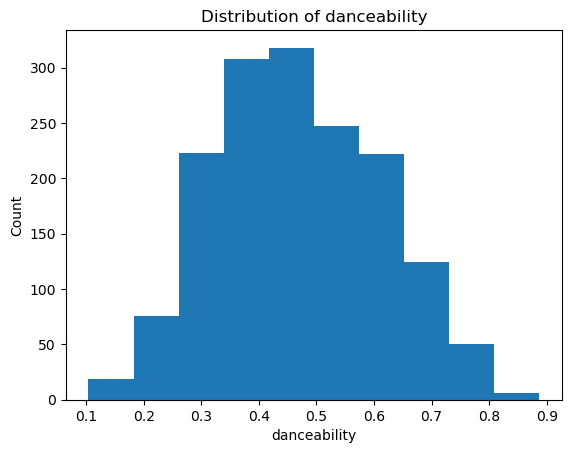

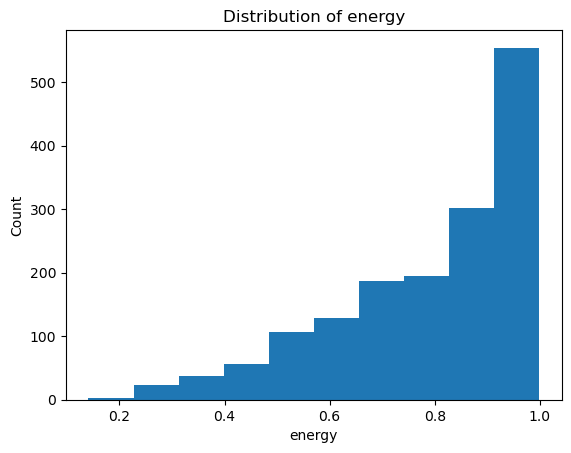

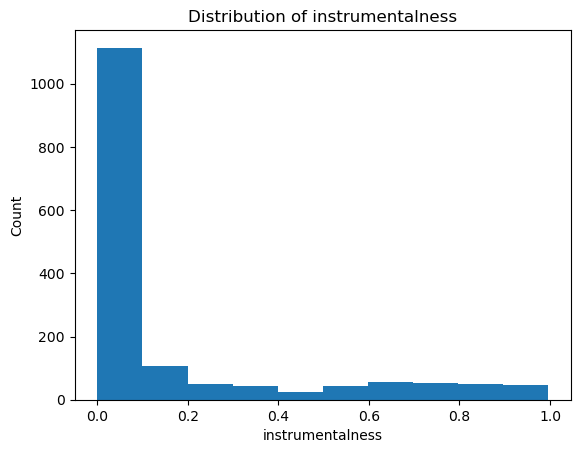

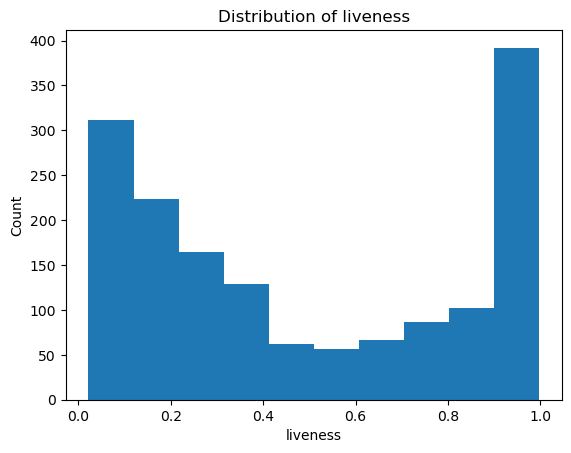

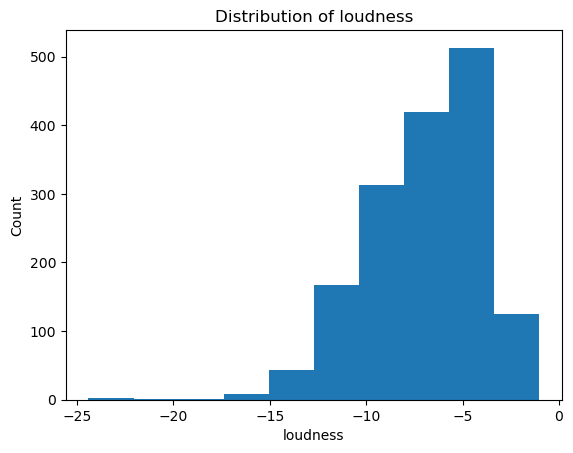

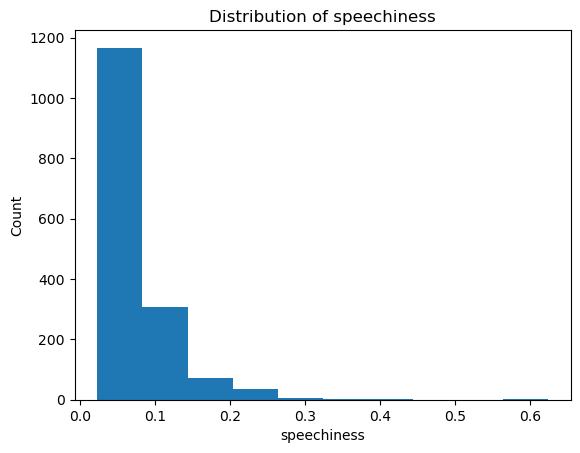

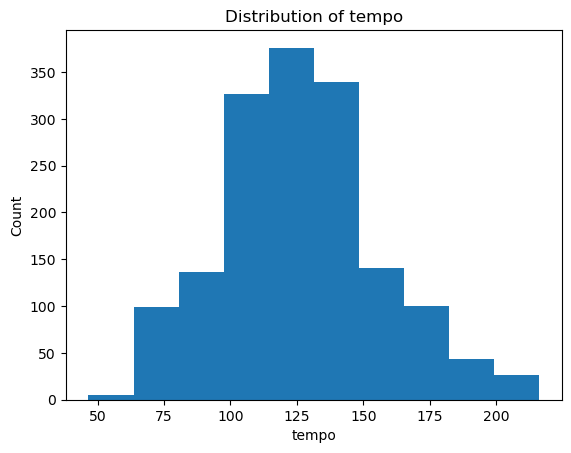

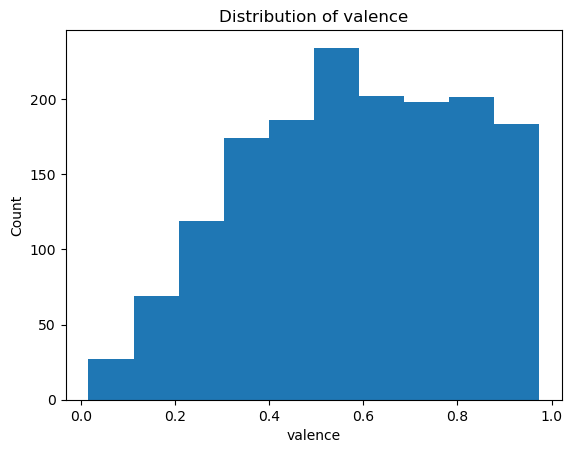

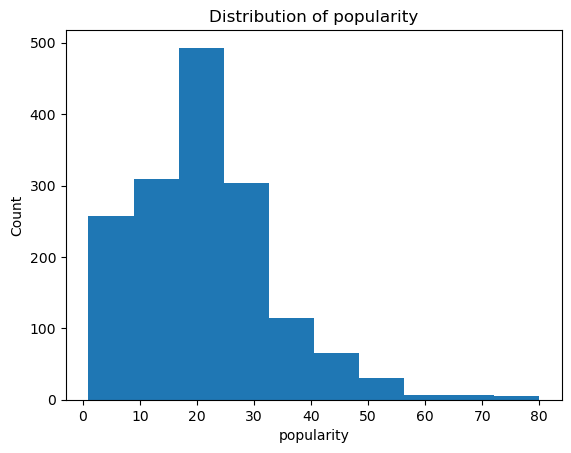

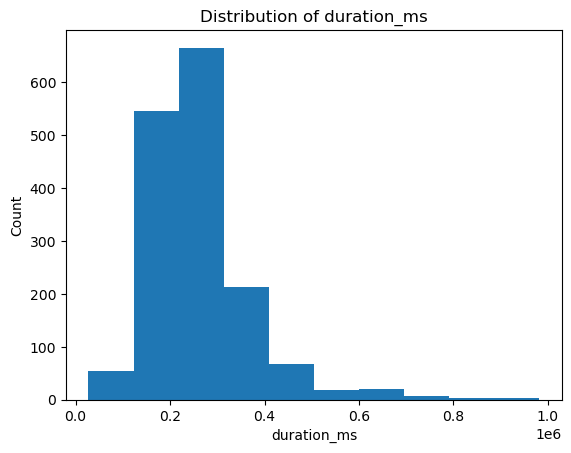

In [108]:
# Calculate the mean, median, and standard deviation of each feature
df.describe()

# Create histograms for each feature
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

# Create correlation matrix to identify relationships between features
corr_matrix = df.corr()


<AxesSubplot:>

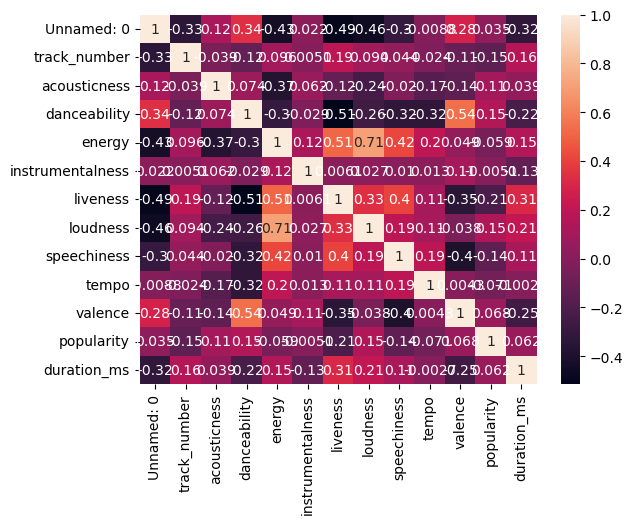

In [109]:
# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)


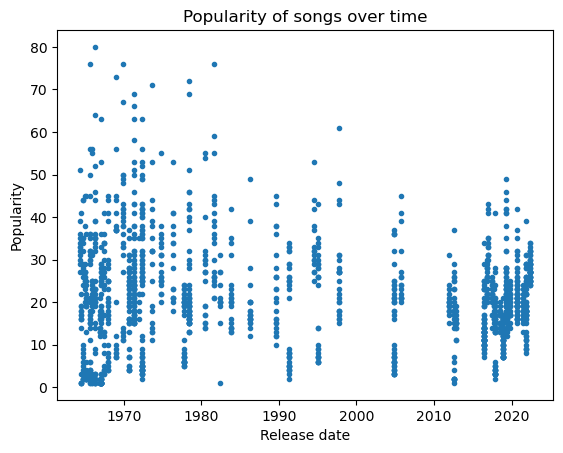

Coefficients: [ 6.10616167e+00  9.42465591e+00 -6.45738978e+00  6.32716701e-02
 -7.14842743e+00  1.43704316e+00 -1.66970676e+01  8.39700841e-05
 -2.95239492e+00]


In [110]:
# Plot the popularity of songs over time
plt.plot(df['release_date'], df['popularity'], '.')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.title('Popularity of songs over time')
plt.show()

# Create a linear regression model to predict the popularity of a song based on its features

model = LinearRegression()
model.fit(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']], df['popularity'])

# Print the coefficients of the linear regression model
print('Coefficients:', model.coef_)


C:\Users\Vimal Gopan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


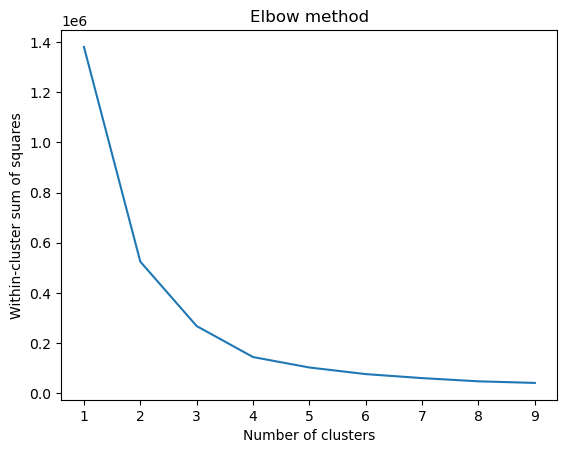

In [111]:
# Calculate the WCSS for different numbers of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']])
    wcss.append(kmeans.inertia_)

# Plot the WCSS curve
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method')
plt.show()

In [112]:
# Create a KMeans clustering model
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']])

# Predict the cluster labels for each song
cluster_labels = kmeans.predict(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']])


In [113]:
# Add the predicted cluster labels to your DataFrame
df['cluster_label'] = cluster_labels

# Calculate the mean, median, and standard deviation of each feature for each cluster
cluster_stats = df.groupby('cluster_label').describe()

# Print the cluster stats
print(cluster_stats)


              Unnamed: 0                                               \
                   count        mean         std   min     25%    50%   
cluster_label                                                           
0                  389.0  735.154242  452.407126   1.0  327.00  752.0   
1                  319.0  829.843260  478.263270   5.0  396.00  814.0   
2                  188.0  722.877660  386.377847  24.0  473.50  692.0   
3                  195.0  784.364103  457.461751   6.0  430.00  817.0   
4                  398.0  848.565327  481.857703   0.0  423.75  892.5   
5                  104.0  926.432692  466.412288  29.0  514.75  905.5   

                               track_number            ... popularity        \
                   75%     max        count      mean  ...        75%   max   
cluster_label                                          ...                    
0              1142.00  1568.0        389.0  9.071979  ...       26.0  76.0   
1              1290.50  16

In [114]:
# Remove the missing values from df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
df = df.dropna(subset=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])


In [115]:
# Calculate the silhouette score
silhouette_score = silhouette_score(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']], cluster_labels)

# Print the silhouette score
print('Silhouette score:', silhouette_score)

Silhouette score: 0.4841183706896822


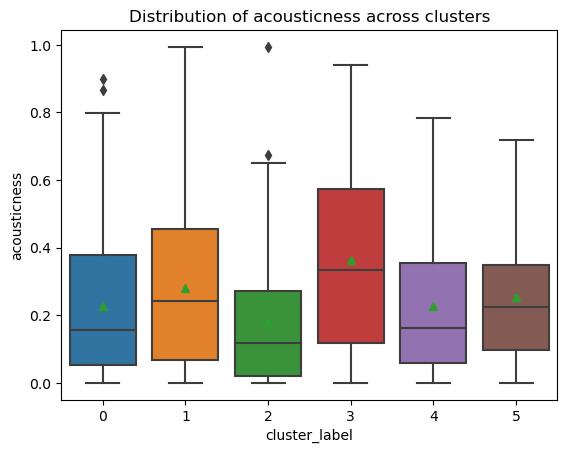

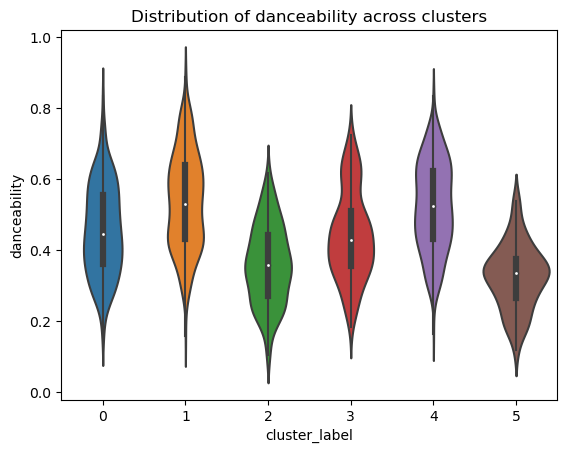

In [116]:
# Create boxplots to compare the distribution of features across clusters
sns.boxplot(
    x = 'cluster_label',
    y = 'acousticness',
    showmeans=True,
    data=df
)
plt.title('Distribution of acousticness across clusters')
plt.show()

# Create violin plots to compare the distribution of features across clusters
sns.violinplot(
    x = 'cluster_label',
    y = 'danceability',
    showmeans=True,
    data=df
)
plt.title('Distribution of danceability across clusters')
plt.show()


In [118]:
# Create a dictionary to store the cohorts of songs
cohorts = {}

# Iterate over the cluster labels and create a list for each cluster
for cluster_label in range(6):
    cohorts[cluster_label] = []

# Iterate over the data frame and add each song to its corresponding cohort
for i in range(len(df)):
    cluster_label = cluster_labels[i]
    cohorts[cluster_label].append(df.iloc[i, 0])


In [119]:
for cluster_label in cohorts.keys():
    print('Cluster {}: {}'.format(cluster_label, cohorts[cluster_label]))

Cluster 0: [1, 2, 3, 4, 8, 12, 15, 17, 18, 19, 20, 22, 26, 39, 48, 49, 55, 57, 63, 66, 88, 89, 94, 95, 101, 104, 105, 106, 108, 111, 115, 117, 118, 121, 122, 124, 125, 132, 135, 136, 138, 148, 149, 150, 151, 156, 157, 161, 163, 164, 171, 174, 175, 176, 178, 181, 182, 189, 190, 194, 200, 201, 202, 203, 210, 211, 212, 213, 216, 222, 223, 224, 232, 235, 238, 239, 241, 247, 255, 257, 264, 265, 266, 275, 276, 279, 283, 284, 290, 299, 300, 305, 306, 307, 311, 312, 318, 327, 328, 333, 334, 335, 336, 337, 338, 339, 346, 348, 349, 350, 352, 353, 354, 357, 371, 375, 389, 397, 405, 407, 408, 410, 414, 415, 416, 418, 420, 421, 423, 424, 425, 426, 431, 432, 436, 454, 456, 467, 470, 471, 473, 485, 487, 488, 489, 492, 499, 510, 512, 518, 520, 526, 528, 540, 542, 543, 544, 545, 564, 572, 579, 586, 608, 609, 617, 622, 624, 625, 628, 629, 632, 634, 637, 638, 642, 649, 650, 654, 659, 660, 663, 664, 667, 669, 682, 695, 704, 709, 718, 723, 730, 740, 743, 751, 752, 757, 760, 768, 769, 774, 775, 780, 786, 78